In [2]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [3]:
from bs4 import BeautifulSoup
import requests
import json
from html.parser import HTMLParser
import urllib.request
import string
import random
import re
import pandas as pd
import numpy as np

In [4]:
#Need a JS enabled web service
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import selenium.webdriver.chrome.service as service
from selenium.webdriver.chrome.options import Options
import time

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imported the data files

In [6]:
df = pd.read_excel('cleaned_overall_dataset.xlsx',index_col=0)

# Visualization

In [7]:
df.head()

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,Change in rank (500),Year,Cat
0,1,Walmart,485873.0,0.8,13643.0,-7.2,198825.0,218619.0,0,2300000,0,2017,No filter
1,2,Berkshire Hathaway,223604.0,6.1,24074.0,0.0,620854.0,411035.0,2,367700,2,2017,No filter
2,3,Apple,215639.0,-7.7,45687.0,-14.4,321686.0,753718.0,0,116000,0,2017,No filter
3,4,Exxon Mobil,205004.0,-16.7,7840.0,-51.5,330314.0,340056.0,-2,72700,-2,2017,No filter
4,5,McKesson,192487.0,6.2,2258.0,53.0,56563.0,31439.0,0,68000,0,2017,No filter


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   4287 non-null   int64  
 1   Name                   4287 non-null   object 
 2   Revenue ($M)           4287 non-null   float64
 3   Revenue % change       4287 non-null   float64
 4   Profit ($M)            4287 non-null   float64
 5   Profit % change        4287 non-null   float64
 6   Assets ($M)            4287 non-null   float64
 7   Market Value ($M)      4287 non-null   float64
 8   Change in rank (1000)  4287 non-null   int64  
 9   Employees              4287 non-null   int64  
 10  Change in rank (500)   4287 non-null   int64  
 11  Year                   4287 non-null   int64  
 12  Cat                    4287 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 468.9+ KB


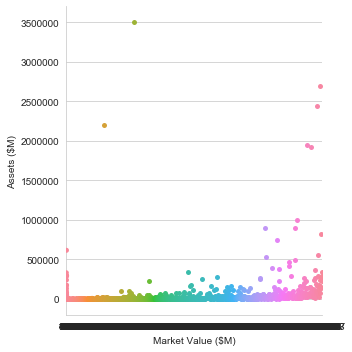

In [9]:
# Market value vs Assets in 2020
idx=np.where((df['Cat']=='No filter') & (df['Year']==2020)) 
temp_df = df.loc[idx]
sns.catplot(x='Market Value ($M)',y='Assets ($M)',kind='swarm',data=temp_df,aspect=1)

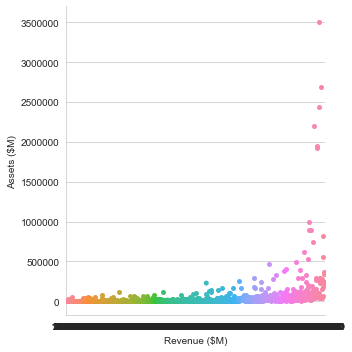

In [10]:
# Revenue vs Assets in 2020
idx=np.where((df['Cat']=='No filter') & (df['Year']==2020)) 
temp_df = df.loc[idx]
sns.catplot(x='Revenue ($M)',y='Assets ($M)',kind='swarm',data=temp_df,aspect=1)

In [29]:
temp_df = df[df['Cat']=='No filter'].groupby('Year').sum()
temp_df = temp_df.reset_index()
temp_df['Revenue ($M)'] = temp_df['Revenue ($M)']/1000
temp_df['Profit ($M)'] = temp_df['Profit ($M)']/1000
temp_df['Assets ($M)'] = temp_df['Assets ($M)']/1000
temp_df['Market Value ($M)'] = temp_df['Market Value ($M)']/1000
temp_df.head()

,Year,Rank,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,Change in rank (500)
0,2017,500496,13570.0760,3620.8,971.7867,1620.2,43953.3920,22418.9700,10345,33574496,549
1,2018,500499,14378.1767,11357.9,1109.8563,40741.7,46013.7734,24969.0784,8872,33566765,918
2,2019,500498,15364.0591,10983.0,1257.7892,155657.3,46886.4734,26171.0375,9731,34011160,2115
3,2020,500497,15902.3390,6185.5,1342.0134,8252.6,50514.9042,23421.4741,3193,34615976,426


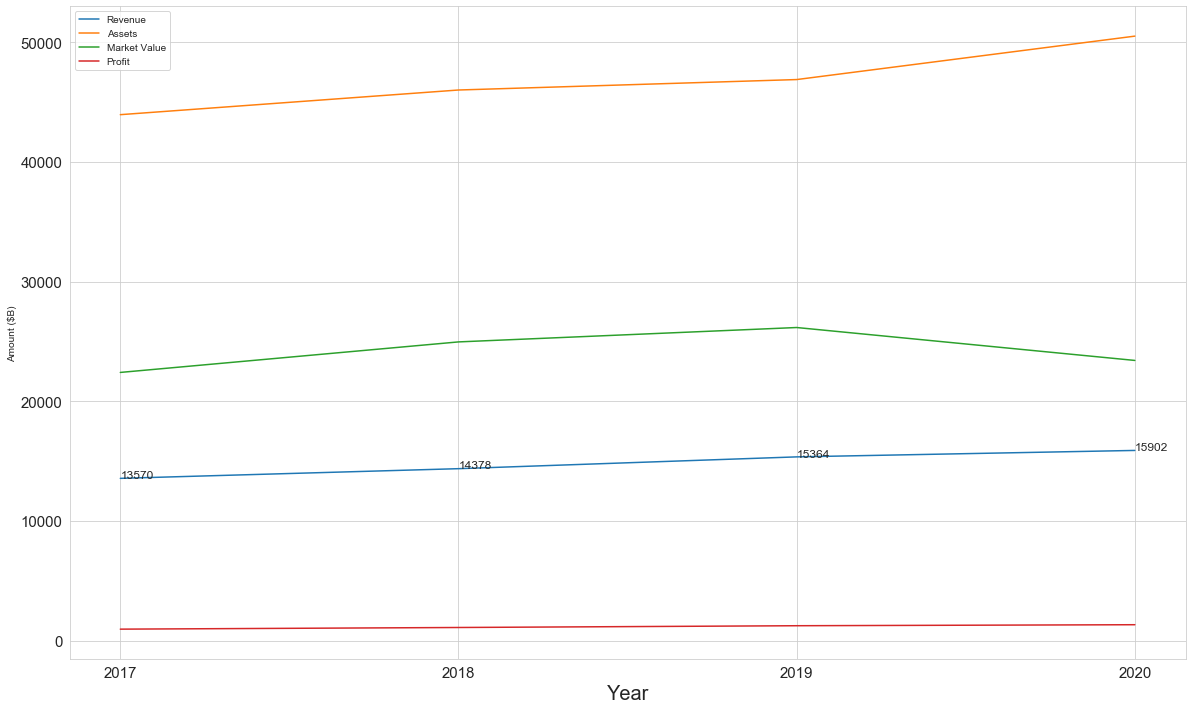

In [46]:
plt.figure(figsize=(20,12))
ax = sns.lineplot(x='Year',y='Revenue ($M)',data=temp_df,label='Revenue')
sns.lineplot(x='Year',y='Assets ($M)',data=temp_df,label='Assets')
sns.lineplot(x='Year',y='Market Value ($M)',data=temp_df,label='Market Value')
sns.lineplot(x='Year',y='Profit ($M)',data=temp_df,label='Profit')
plt.tick_params(axis='both',labelsize=15)
plt.xticks([2017,2018,2019,2020])
plt.xlabel('Year',size=20)
plt.ylabel('Amount ($B)')
for x, y in zip(temp_df['Year'],temp_df['Revenue ($M)']):
    ax.text(x,y,round(y),fontsize=12)
plt.show()

# Modelling prep

In [ ]:
df.head(2)

In [ ]:
df.describe()

In [ ]:
dfPlot = df[(df['Year']== 2019) & (df['Employees'] < 80000) & (df['Profit ($M)'] > -10000)]

In [ ]:
dfPlot = dfPlot.dropna()

In [ ]:
dfPlot.shape

In [ ]:
sns.kdeplot( dfPlot['Profit ($M)'], dfPlot['Employees'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [ ]:
sns.kdeplot( dfPlot['Profit ($M)'], dfPlot['Assets ($M)'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [ ]:
sns.kdeplot( dfPlot['Revenue ($M)'], dfPlot['Market Value ($M)'],
                 cmap="plasma", shade=True, shade_lowest=False)

## Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X.describe()

In [ ]:
X = dfPlot.drop(['Rank', 'Name', 'Revenue % change','Profit % change', 'Change in rank (1000)', 'Change in rank (500)', 'Year', 'Assets ($M)'],axis=1)
y = dfPlot['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict( X_test)

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients